In [2]:
# Standart imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Keyword Extractor (YAKE)
import yake as yk

In [4]:
# Setup random seed
np.random.seed(42)

# Import data 
tomer_dataset = pd.read_csv("datasets/tomer-dataset.csv", encoding = "ISO-8859-1")

# Ignoring unnecessary columns 
tomer_dataset.drop("URL", axis=1, inplace=True)
tomer_dataset.drop("ID", axis=1, inplace=True)
tomer_dataset.drop("Unnamed: 5", axis=1, inplace=True)
tomer_dataset

,Title,Body,Classification
0,AC2: Account Management -- Show All Accounts -...,#### Trigger When the user enters management m...,0.0
1,"AC1.1: Add an Account -- Launch to ""Add New"" o...","AC1.1: Add an Account -- Launch to ""Add New"" o...",0.0
2,Tor for Android,Tor for Android,0.0
3,Encrypt outgoing email to user's public key,Let the user specify his PGP or similar key in...,0.0
4,Timber logging in release builds,RiotX logs all Timber messages in release buil...,0.0
...,...,...,...
2808,"Web beacon/GIF poorly worded, unnecessary",Two issues with the Web Beacon section of the ...,NaN
2809,Please expand on my vital interests.,Paragraph two here: https://github.com/appdotn...,NaN
2810,"""may also obtain information"" is too broad","The sentence ""We may also obtain information f...",NaN
2811,"Rephrase ""is our asset"" to something about lic...",https://github.com/appdotnet/terms-of-service/...,NaN


In [5]:
# A set that contains only the annotated(1) violations
tomer_dataset_pv = tomer_dataset.loc[tomer_dataset.Classification == 1]
tomer_dataset_pv

,Title,Body,Classification
8,Send in-app feedback to wiki page instead of e...,"Currently, the `Feedback` button (in the app's...",1.0
11,Issue 10906: prevent personal notes from being...,Fixes #10906,1.0
13,Potential directory registration consent viola...,We've received [a report on the Friendica Dire...,1.0
16,Calling turns on video without participant con...,"### Steps to reproduce 1. In a group chat, st...",1.0
18,Block Fav Icon Request,### ð_ Run away from favicon trackersº Why ...,1.0
...,...,...,...
193,Delete in-memory history on transition from PBM,Follow-up from here: https://github.com/brave/...,1.0
195,Allow masking PII,Currently PII can be sent with some of the col...,1.0
197,riot transmits video and audio in one directio...,### Description I was speaking to someone run...,1.0
215,Geography-Driven Events,Geography-Driven Events,1.0


In [6]:
# Keeping only the text columns
tomer_dataset_pv = tomer_dataset_pv.drop("Classification", axis=1)
tomer_dataset_pv

,Title,Body
8,Send in-app feedback to wiki page instead of e...,"Currently, the `Feedback` button (in the app's..."
11,Issue 10906: prevent personal notes from being...,Fixes #10906
13,Potential directory registration consent viola...,We've received [a report on the Friendica Dire...
16,Calling turns on video without participant con...,"### Steps to reproduce 1. In a group chat, st..."
18,Block Fav Icon Request,### ð_ Run away from favicon trackersº Why ...
...,...,...
193,Delete in-memory history on transition from PBM,Follow-up from here: https://github.com/brave/...
195,Allow masking PII,Currently PII can be sent with some of the col...
197,riot transmits video and audio in one directio...,### Description I was speaking to someone run...
215,Geography-Driven Events,Geography-Driven Events


In [7]:
# Creating a string that contains all the data together 
data_to_string = tomer_dataset_pv.to_string() 
data_to_string

'                                                                                                                   Title                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [8]:
# Setting up Keyword Extractor
kw_extractor = yk.KeywordExtractor()

tomer_dataset_keywords = kw_extractor.extract_keywords(data_to_string)
tomer_dataset_keywords

[('user', 0.0022842436875735207),
 ('Data', 0.004364497200806744),
 ('users', 0.005038772840235708),
 ('trips', 0.00669480424448753),
 ('trip data', 0.0072040733753593504),
 ('user enumeration settings', 0.007829483784654492),
 ('API', 0.0078403972820432),
 ('Respect user enumeration', 0.00821513105931493),
 ('group', 0.008306360730503948),
 ('information', 0.00881289105351472),
 ('Steps to reproduce', 0.010236009655001797),
 ('trip', 0.010376946578955671),
 ('Request', 0.012076814006125624),
 ('private', 0.01221366748025146),
 ('version', 0.012520524315247184),
 ('Metrics API', 0.01387457057951706),
 ('user enumeration', 0.014765290478037228),
 ('Describe', 0.014834794163726676),
 ('add', 0.0148429979201044),
 ('special group', 0.01497820382480693)]

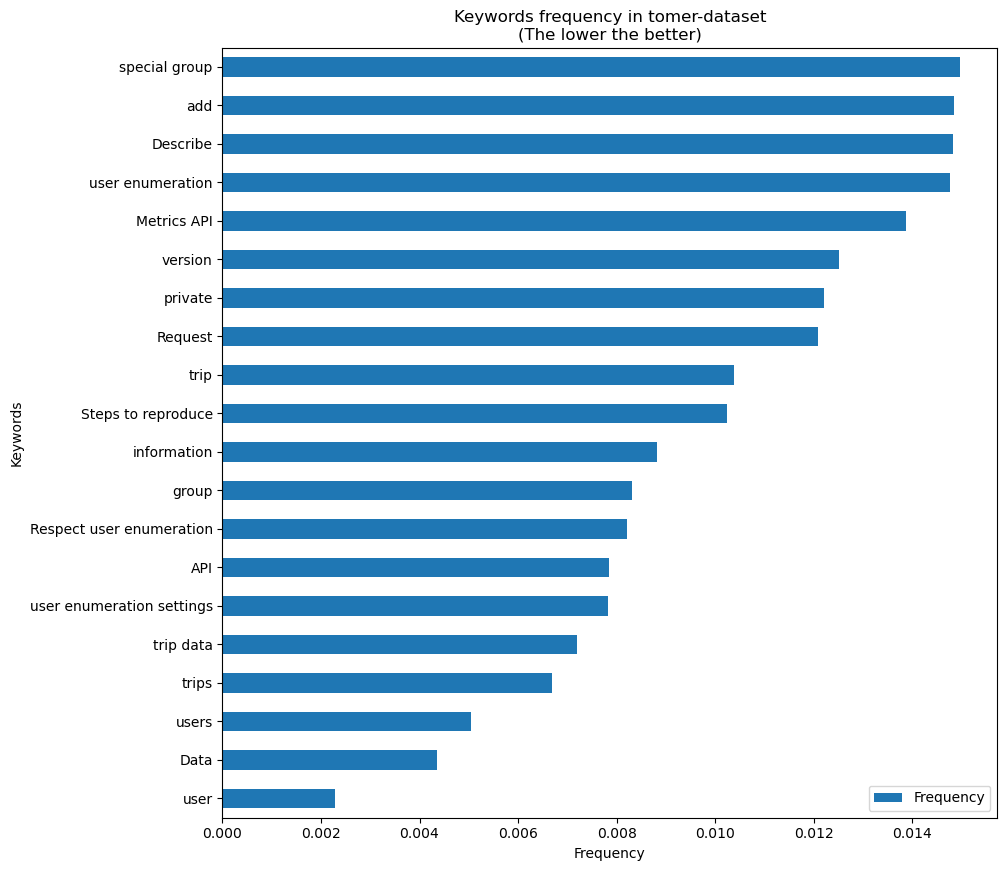

In [9]:
keywords = [w[0] for w in tomer_dataset_keywords]
frequency = [w[1] for w in tomer_dataset_keywords]
tomer_keywords_df = pd.DataFrame({"Keywords": keywords,
                                  "Frequency": frequency})
plot = tomer_keywords_df.plot.barh(figsize=(10,10), title="Keywords frequency in tomer-dataset\n(The lower the better)")
plot.set_yticks(range(0,20))
plot.set_yticklabels(keywords)
plot.set(ylabel="Keywords", xlabel="Frequency")
plot;

In [10]:
# Getting data ready
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV

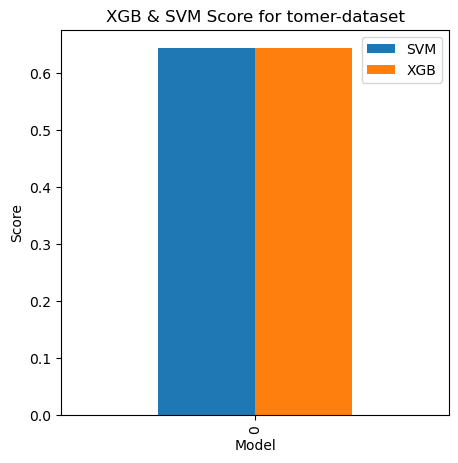

In [11]:
# Drop the rows with missing classifications
tomer_dataset_for_model = tomer_dataset.dropna(subset=["Classification"])

# Define different features and transformer pipelines
categorical_features = ["Title", "Body"]
categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

# Setup preprocessing steps (convert to numbers)
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features)])

# Create a modelling pipeline
xgb_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("xgb_model", GradientBoostingClassifier())])

svm_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("svm_model", SVC())])

# Split data
X = tomer_dataset_for_model.drop("Classification", axis=1)
y = tomer_dataset_for_model["Classification"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the models
xgb_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
svm_score = [svm_model.score(X_test, y_test)]
xgb_score = [xgb_model.score(X_test, y_test)]

# Analysis graph
tomer_scoring_results = pd.DataFrame({"SVM": svm_score,
                                  "XGB": xgb_score})
plot = tomer_scoring_results.plot.bar(figsize=(5,5), title="XGB & SVM Score for tomer-dataset")
plot.set(xlabel="Model", ylabel="Score")
plot;